In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd 
import numpy as np
from scipy.stats import norm
import seaborn as sns # visualization


# plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

#### Descriptive Statistics

In [11]:
# Read the combined dataset and print the contents.
data = pd.read_csv('ad-clean-data.csv', index_col=False,)
data.head()

,MCI,AD,Age,MMSE,ADAS11,ADAS13,TotalICVolume,3rdVentricle,4thVentricle,RightAccumbensArea,...,LeftPutamen,RightThalamusProper,LeftThalamusProper,RightVentralDC,LeftVentralDC,LeftBasalForebrain,RightBasalForebrain,Right Cortex,Left Cortex,Cerebellar Vermis
0,0,1,72.400000,21.0,12.67,22.67,1214750.869,2706.384202,3609.184822,291.551435,...,3592.236503,5822.857187,6127.523393,3853.724849,4152.741615,473.947627,490.895945,232505.2075,254897.6692,10233.25360
1,0,1,73.396578,22.0,12.67,22.67,1214750.869,2996.197727,3635.575129,234.388234,...,3260.574014,5330.552084,5739.352444,3980.588189,4250.580968,420.033343,238.099130,227700.1954,247076.2894,10115.60241
2,0,1,74.415058,19.0,33.67,48.67,1214750.869,3072.165927,4002.862747,191.821471,...,2756.325428,5240.030635,5520.106101,4061.094265,4344.998101,424.949035,334.680108,212094.4008,235671.8185,10231.82172
3,0,1,82.301027,25.0,7.00,13.00,1214750.869,3022.121600,2896.213470,195.010691,...,2833.204993,5583.160444,5788.291668,4031.563103,4246.814859,552.385195,454.988672,238270.3091,244937.4547,10110.30317
4,0,1,82.793840,25.0,10.67,15.67,1214750.869,2926.762714,2879.883925,199.507404,...,2521.751782,5833.138606,5973.556932,4044.113197,4284.285225,433.465267,486.449200,229719.9112,234663.5521,10331.10389


In [12]:
#basic descriptive statistics
data = data.drop(['MCI'], axis=1)
data.describe()

,AD,Age,MMSE,ADAS11,ADAS13,TotalICVolume,3rdVentricle,4thVentricle,RightAccumbensArea,LeftAccumbensArea,...,LeftPutamen,RightThalamusProper,LeftThalamusProper,RightVentralDC,LeftVentralDC,LeftBasalForebrain,RightBasalForebrain,Right Cortex,Left Cortex,Cerebellar Vermis
count,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000,2366.000000,2366.000000,2366.000000,2366.000000,...,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000
mean,0.430685,75.955417,26.029923,12.171948,18.575838,1214750.869,2156.941977,2409.155355,323.726197,320.030522,...,3826.436217,6346.923442,6535.781711,4173.481078,4363.690877,431.351124,425.913153,253651.943347,253278.682319,9799.282409
std,0.495277,6.626198,4.480089,9.710909,13.618586,0.000,730.930763,667.719350,91.697724,90.902078,...,709.271763,713.083457,715.145499,341.198536,359.463713,118.417026,109.732977,16322.441790,15960.186818,1170.656330
min,0.000000,55.100000,2.000000,0.000000,0.000000,1214750.869,400.381584,1064.293134,0.000000,0.000000,...,295.205715,1736.965469,2102.574334,3131.753915,3129.296019,134.919627,145.684738,176034.555500,173941.256600,4476.289516
25%,0.000000,71.900000,23.000000,5.000000,8.000000,1214750.869,1591.037991,1943.052145,269.125721,267.934324,...,3419.404171,5940.791642,6135.742540,3943.726349,4126.498002,346.868827,346.734867,243957.153175,244213.247000,9024.134585
50%,0.000000,75.900000,28.000000,9.000000,14.000000,1214750.869,2105.761463,2285.483718,329.650724,319.751446,...,3815.600424,6388.697468,6577.886326,4165.598703,4353.139423,420.495820,422.629811,255146.523050,254925.338450,9803.294385
75%,1.000000,80.400000,30.000000,18.000000,28.330000,1214750.869,2654.325422,2727.731224,382.099262,371.781768,...,4218.779009,6813.088219,6979.311794,4384.241721,4580.191851,503.229169,496.142965,265095.560825,263813.801625,10571.230390
max,1.000000,95.620534,30.000000,66.000000,94.135797,1214750.869,5339.949837,6808.261084,671.328887,839.267903,...,7624.914581,9895.594977,9980.384681,5790.920872,6149.385048,930.204999,863.066283,293396.840100,299183.521400,14337.272370


The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew. 

In [13]:
data.skew()

AD                            0.280142
Age                          -0.240639
MMSE                         -1.462474
ADAS11                        1.364718
ADAS13                        1.036058
TotalICVolume                 0.000000
3rdVentricle                  0.458567
4thVentricle                  1.471311
RightAccumbensArea           -0.269857
LeftAccumbensArea             0.273702
RightAmygdala                -0.345307
LeftAmygdala                 -0.353636
Brainstem.1                   0.316525
RightCaudate                  2.222298
LeftCaudate                   2.155399
RightCelebellumExterior      -0.123390
LeftCerebellumExterior       -0.176039
RightCerebellumWhiteMatter    1.231019
LeftCerebellumWhiteMatter     1.277795
RightCerebralWhiteMatter      0.518172
LeftCerebralWhiteMatter       0.662019
RightHippocampus             -0.309332
LeftHippocampus              -0.161269
RightInfLatVentricle          1.904603
LeftInflatVentricle           1.608211
RightLateralVentricle    

1019 observations indicating a patient has AD and 1347 show normal cognition

In [14]:
labels_split = data.groupby('AD', axis=0)
pd.DataFrame(labels_split.size(), columns=['# of observations'])

,# of observations
AD,
0,1347
1,1019


In [16]:
y = data.AD                      
list = ['AD']
data = data.drop(list,axis = 1 )
data.head()

,Age,MMSE,ADAS11,ADAS13,TotalICVolume,3rdVentricle,4thVentricle,RightAccumbensArea,LeftAccumbensArea,RightAmygdala,...,LeftPutamen,RightThalamusProper,LeftThalamusProper,RightVentralDC,LeftVentralDC,LeftBasalForebrain,RightBasalForebrain,Right Cortex,Left Cortex,Cerebellar Vermis
0,72.400000,21.0,12.67,22.67,1214750.869,2706.384202,3609.184822,291.551435,252.005358,835.108228,...,3592.236503,5822.857187,6127.523393,3853.724849,4152.741615,473.947627,490.895945,232505.2075,254897.6692,10233.25360
1,73.396578,22.0,12.67,22.67,1214750.869,2996.197727,3635.575129,234.388234,238.099130,800.650949,...,3260.574014,5330.552084,5739.352444,3980.588189,4250.580968,420.033343,238.099130,227700.1954,247076.2894,10115.60241
2,74.415058,19.0,33.67,48.67,1214750.869,3072.165927,4002.862747,191.821471,172.981862,750.158965,...,2756.325428,5240.030635,5520.106101,4061.094265,4344.998101,424.949035,334.680108,212094.4008,235671.8185,10231.82172
3,82.301027,25.0,7.00,13.00,1214750.869,3022.121600,2896.213470,195.010691,142.122747,919.989054,...,2833.204993,5583.160444,5788.291668,4031.563103,4246.814859,552.385195,454.988672,238270.3091,244937.4547,10110.30317
4,82.793840,25.0,10.67,15.67,1214750.869,2926.762714,2879.883925,199.507404,20.386822,911.846955,...,2521.751782,5833.138606,5973.556932,4044.113197,4284.285225,433.465267,486.449200,229719.9112,234663.5521,10331.10389


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [19]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [6.55376024e-02 7.83857162e+02 7.82712369e+03 1.13188283e+04
 2.83405593e-21 3.87250932e+04 2.79488029e+02 2.99032292e+03
 2.38360224e+03 2.20301135e+04 2.34331293e+04 1.71939011e+01
 4.03506693e+04 2.90793637e+04 4.19119523e+02 2.06369974e+02
 1.72504343e+04 2.23615474e+04 8.73128057e+03 6.97036934e+03
 4.84791676e+04 5.60550444e+04 1.73783689e+05 1.46953869e+05
 1.19406113e+06 1.45507879e+06 2.76485560e+02 5.72687675e+00
 4.13587329e+03 3.89336775e+03 1.12019411e+04 1.01052070e+04
 3.38453783e+00 3.49989913e+01 3.32600899e+03 2.30540333e+03
 2.24838064e+05 2.50804698e+05 1.56852832e-01]
Feature list: Index(['Age', 'MMSE', 'ADAS11', 'ADAS13', 'TotalICVolume', '3rdVentricle',
       '4thVentricle', 'RightAccumbensArea', 'LeftAccumbensArea',
       'RightAmygdala', 'LeftAmygdala', 'Brainstem.1', 'RightCaudate',
       'LeftCaudate', 'RightCelebellumExterior', 'LeftCerebellumExterior',
       'RightCerebellumWhiteMatter', 'LeftCerebellumWhiteMatter',
       'RightCerebralWhit

In [20]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Create the RFE object and rank each pixel
rf_1 = RandomForestClassifier()      
rfe = RFE(estimator=rf_1, n_features_to_select=10, step=1)
rfe = rfe.fit(x_train, y_train)

In [21]:
print('Chosen best 10 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 10 feature by rfe: Index(['Age', 'MMSE', 'ADAS11', 'ADAS13', 'RightAmygdala', 'LeftAmygdala',
       'RightHippocampus', 'LeftHippocampus', 'RightInfLatVentricle',
       'LeftInflatVentricle'],
      dtype='object')


In [22]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
rf_2 = RandomForestClassifier() 
rfecv = RFECV(estimator=rf_2, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 17
Best features : Index(['Age', 'MMSE', 'ADAS11', 'ADAS13', '4thVentricle', 'RightAmygdala',
       'LeftAmygdala', 'Brainstem.1', 'RightHippocampus', 'LeftHippocampus',
       'RightInfLatVentricle', 'LeftInflatVentricle', 'RightLateralVentricle',
       'LeftLateralVentricle', 'RightPallidum', 'LeftThalamusProper',
       'Left Cortex'],
      dtype='object')


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


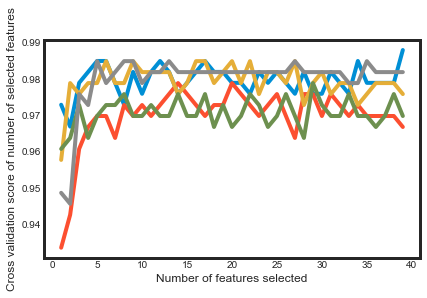

In [23]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Neuro Features

In [24]:
data = pd.read_csv('/Users/umayah/Documents/uni/Project/code/training/AD_NC/data/Neuro_AD_NC.csv', index_col=False)

In [5]:
y = data.AD                      
list = ['AD']
data = data.drop(list,axis = 1 )
data.head()

,MMSE,ADAS11,ADAS13
0,22.0,26.67,38.67
1,12.0,38.33,48.33
2,30.0,4.33,9.33
3,29.0,4.33,9.33
4,30.0,3.33,5.33


/var/folders/qg/_7pvsvx17nb_kxf7rphmscvc0000gn/T/ipykernel_25418/3659824460.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:title={'center':'AD Feature Correlation'}>

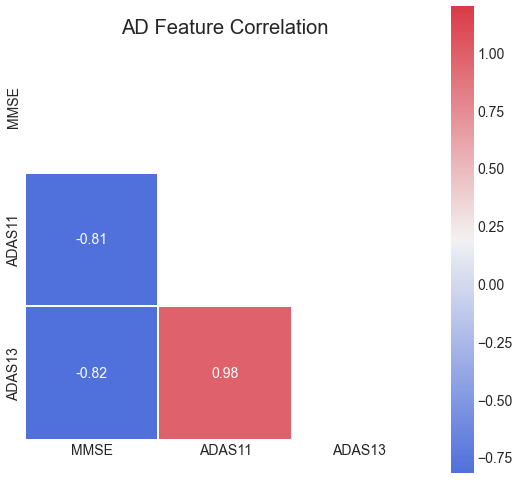

In [6]:
# # plot correlation matrix
plt.style.use('fivethirtyeight')
sns.set_style("white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
data, ax = plt.subplots(figsize=(8, 8))
plt.title('AD Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, ax=ax,annot=True, fmt='.2g',linewidths=2)

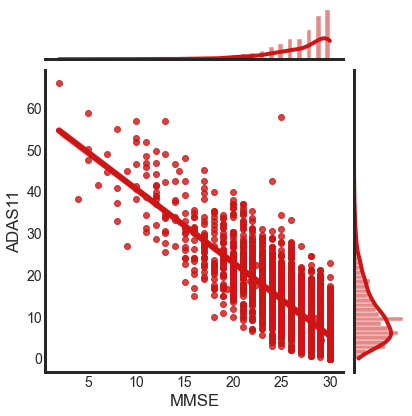

In [41]:
sns.jointplot(data.loc[:,'MMSE'], data.loc[:,'ADAS11'], kind="reg")

### MRI Features

In [62]:
data = pd.read_csv('/Users/umayah/Documents/uni/Project/code/training/AD_NC/data/sMRI_AD_NC.csv', index_col=False)
# data = data.drop('AD', axis=1)
data

,TotalICVolume,3rdVentricle,4thVentricle,RightAccumbensArea,LeftAccumbensArea,RightAmygdala,LeftAmygdala,Brainstem.1,RightCaudate,LeftCaudate,...,RightThalamusProper,LeftThalamusProper,RightVentralDC,LeftVentralDC,LeftBasalForebrain,RightBasalForebrain,Right Cortex,Left Cortex,Cerebellar Vermis,AD
0,1214750.869,2706.384202,3609.184822,291.551435,252.005358,835.108228,912.182725,17367.08342,6505.632312,5574.584495,...,5822.857187,6127.523393,3853.724849,4152.741615,473.947627,490.895945,232505.2075,254897.6692,10233.253600,1
1,1214750.869,2996.197727,3635.575129,234.388234,238.099130,800.650949,819.406019,17141.13145,7376.158593,5921.186362,...,5330.552084,5739.352444,3980.588189,4250.580968,420.033343,238.099130,227700.1954,247076.2894,10115.602410,1
2,1214750.869,3072.165927,4002.862747,191.821471,172.981862,750.158965,817.860661,17073.72283,8844.239201,6858.826533,...,5240.030635,5520.106101,4061.094265,4344.998101,424.949035,334.680108,212094.4008,235671.8185,10231.821720,1
3,1214750.869,2954.135320,2840.931017,257.332709,230.605449,1033.417235,1134.362340,16405.23630,3094.177326,3592.276261,...,5994.747683,6322.101395,4008.205437,4395.198489,395.276294,372.635433,242753.8721,251966.4935,10816.146570,0
4,1214750.869,3022.121600,2896.213470,195.010691,142.122747,919.989054,1123.161465,16199.16377,3109.397590,3475.042637,...,5583.160444,5788.291668,4031.563103,4246.814859,552.385195,454.988672,238270.3091,244937.4547,10110.303170,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,1214750.869,3897.497914,3170.369046,348.100232,331.390590,1136.878336,1099.618949,16413.33070,4192.978343,4742.735924,...,5548.223670,6613.074111,4180.108806,4264.902452,411.098694,520.282189,239684.5495,244014.6299,8832.965541,0
4455,1214750.869,2406.687517,2577.421885,286.750805,294.593408,1126.900916,1076.690228,19722.07312,4100.419322,3726.588581,...,5714.913795,6176.816066,4131.609445,4335.787556,471.998496,492.010655,248666.2235,245058.8064,9273.111774,1
4456,1214750.869,1385.568343,1375.924216,366.649059,381.545791,947.449411,1129.740642,17965.97610,3827.254748,3697.231244,...,5863.973909,6213.573529,4071.285615,4031.848023,717.281978,555.312302,270418.6637,265627.5990,9016.570279,0
4457,1214750.869,1379.796349,1224.019747,372.605386,333.661236,871.396622,1136.693017,17992.79268,3607.775884,3001.590627,...,5789.583644,6022.143144,4111.924066,4146.701703,595.726457,415.716050,257523.1260,251449.4541,8734.288601,0


In [63]:
y = data.AD                       
list = ['AD']
data = data.drop(list,axis = 1 )
data.head()

,TotalICVolume,3rdVentricle,4thVentricle,RightAccumbensArea,LeftAccumbensArea,RightAmygdala,LeftAmygdala,Brainstem.1,RightCaudate,LeftCaudate,...,LeftPutamen,RightThalamusProper,LeftThalamusProper,RightVentralDC,LeftVentralDC,LeftBasalForebrain,RightBasalForebrain,Right Cortex,Left Cortex,Cerebellar Vermis
0,1214750.869,2706.384202,3609.184822,291.551435,252.005358,835.108228,912.182725,17367.08342,6505.632312,5574.584495,...,3592.236503,5822.857187,6127.523393,3853.724849,4152.741615,473.947627,490.895945,232505.2075,254897.6692,10233.25360
1,1214750.869,2996.197727,3635.575129,234.388234,238.099130,800.650949,819.406019,17141.13145,7376.158593,5921.186362,...,3260.574014,5330.552084,5739.352444,3980.588189,4250.580968,420.033343,238.099130,227700.1954,247076.2894,10115.60241
2,1214750.869,3072.165927,4002.862747,191.821471,172.981862,750.158965,817.860661,17073.72283,8844.239201,6858.826533,...,2756.325428,5240.030635,5520.106101,4061.094265,4344.998101,424.949035,334.680108,212094.4008,235671.8185,10231.82172
3,1214750.869,2954.135320,2840.931017,257.332709,230.605449,1033.417235,1134.362340,16405.23630,3094.177326,3592.276261,...,2993.232221,5994.747683,6322.101395,4008.205437,4395.198489,395.276294,372.635433,242753.8721,251966.4935,10816.14657
4,1214750.869,3022.121600,2896.213470,195.010691,142.122747,919.989054,1123.161465,16199.16377,3109.397590,3475.042637,...,2833.204993,5583.160444,5788.291668,4031.563103,4246.814859,552.385195,454.988672,238270.3091,244937.4547,10110.30317


/var/folders/qg/_7pvsvx17nb_kxf7rphmscvc0000gn/T/ipykernel_18542/3008846186.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:title={'center':'AD Feature Correlation'}>

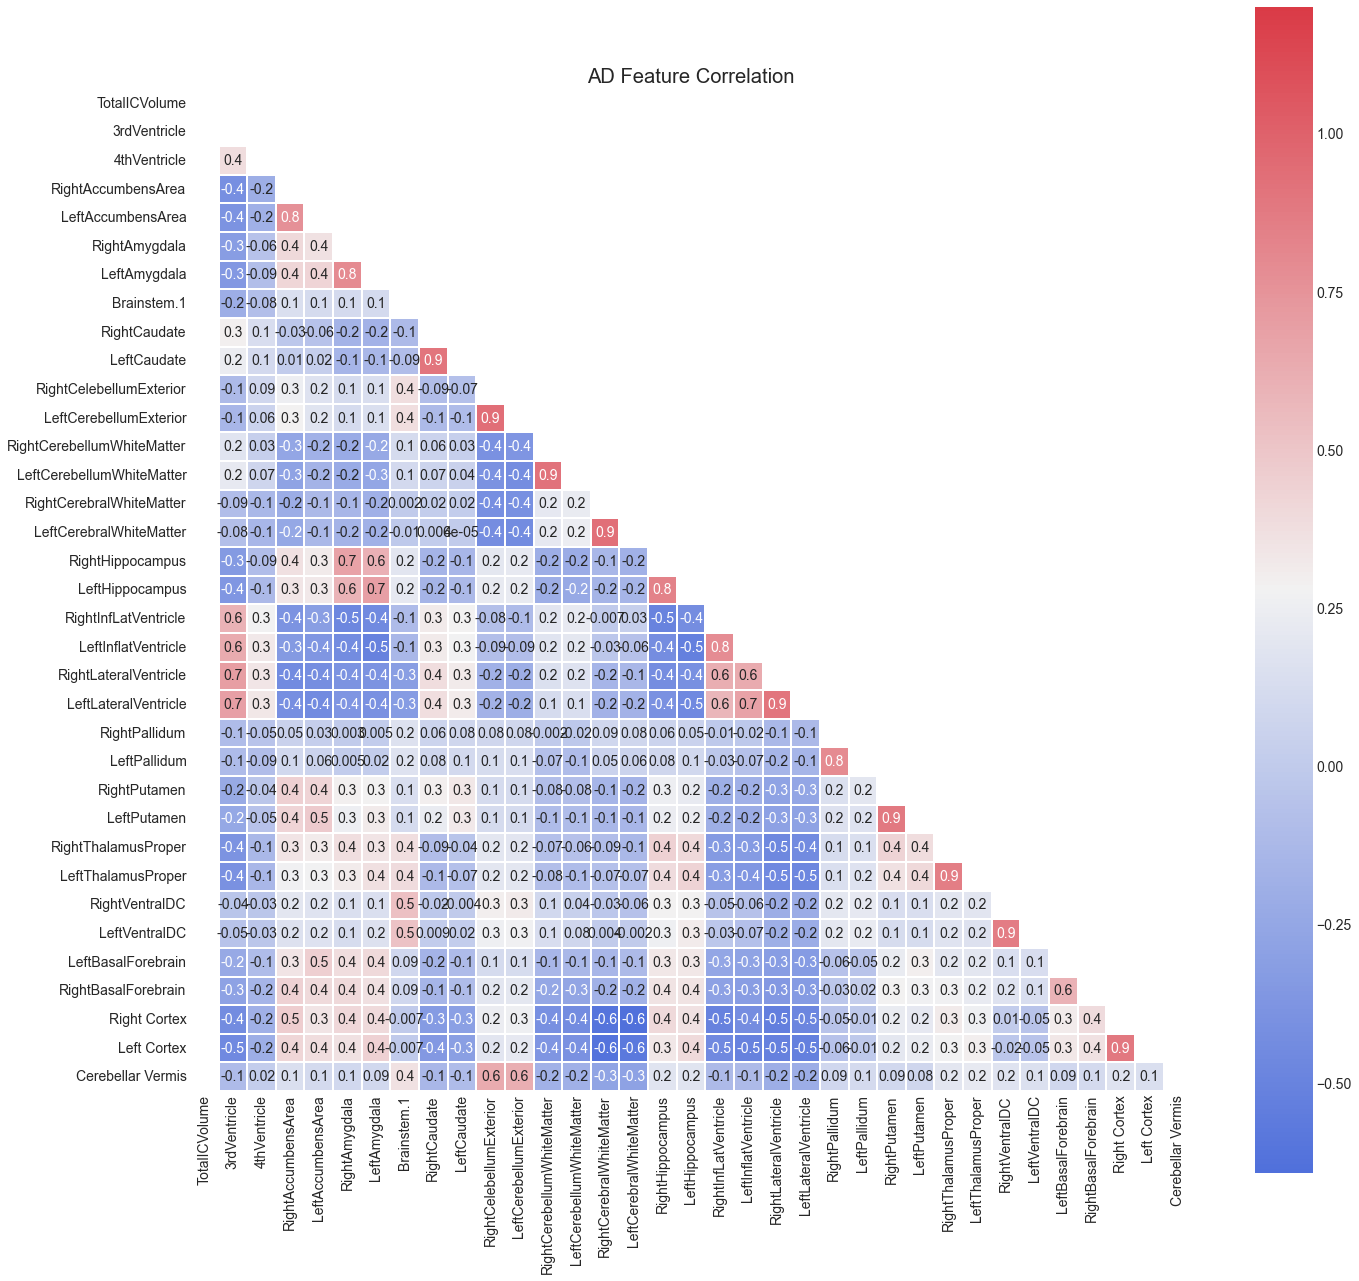

In [66]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

# data = data.drop('AD', axis=1)
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
plot, ax = plt.subplots(figsize=(20, 20))
plt.title('AD Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.1',linewidths=2)